In [44]:
import json
import pennylane as qml
import pennylane.numpy as np
import matplotlib.pyplot as plt

In [54]:
def noisy_Hadamard(lmbda, wire):
    """A Hadamard gate with depolarizing noise on either side.
    
    Args:
        lmbda (float): The parameter defining the depolarizing channel.
        wire (int): The wire the depolarizing channel acts on.
    """
    qml.DepolarizingChannel(lmbda, wires=wire)
    qml.Hadamard(wire)
    qml.DepolarizingChannel(lmbda, wires=wire)

# Oracle matrix for Doc Trine's cell number

flips = [1, 3, 5, 7, 8, 10, 12, 14, 16, 18, 20, 22, 25, 27, 29, 31]

oracle_matrix = np.eye(2**5)
for i in flips:
    oracle_matrix[i, i] = -1


[[ 1.  0.  0. ...  0.  0.  0.]
 [ 0. -1.  0. ...  0.  0.  0.]
 [ 0.  0.  1. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -1.  0.  0.]
 [ 0.  0.  0. ...  0.  1.  0.]
 [ 0.  0.  0. ...  0.  0. -1.]]
[1, 3, 5, 7, 8, 10, 12, 14, 16, 18, 20, 22, 25, 27, 29, 31]


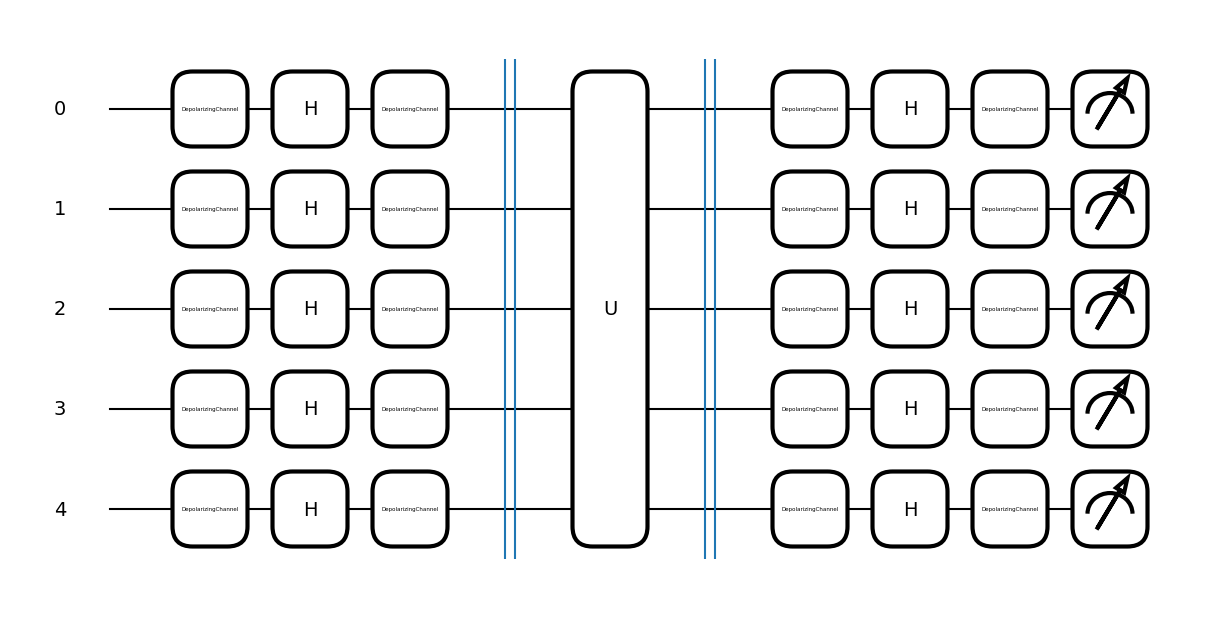

In [55]:
# Implement the Bernstein-Vazirani algorithm with depolarizing noise

dev = qml.device("default.mixed", wires = 5)
@qml.qnode(dev)
def noisy_BernsteinVazirani(lmbda):
    """Runs the Bernstein-Vazirani algorithm with depolarizing noise.

    Args:
        lmbda (float): The probability of erasing the state of a qubit.

    Returns:
        (list(float)): Expectation values for PauliZ on all n wires.
    """



    # Put your code here #
    for ii in range(5):
        noisy_Hadamard(lmbda, ii)

    qml.Barrier(wires=range(5))
    
    # Oracle
    qml.QubitUnitary(oracle_matrix, wires=range(5))
    

    # Hadamard gates
    qml.Barrier(wires=range(5))

    for ii in range(5):
        noisy_Hadamard(lmbda, ii)   

    qml.measurement_grouping = 'expval'

    return [qml.expval(qml.PauliZ(i)) for i in range(5)]
        
qml.draw_mpl(noisy_BernsteinVazirani)(0.1)
print(oracle_matrix)
print(flips)


In [56]:

# These functions are responsible for testing the solution.
def run(test_case_input: str) -> str:

    lmbda = json.loads(test_case_input)
    output = noisy_BernsteinVazirani(lmbda).tolist()

    return str(output)

def check(solution_output: str, expected_output: str) -> None:
    
    solution_output = json.loads(solution_output)
    expected_output = json.loads(expected_output)
    assert np.allclose(
        solution_output, expected_output, rtol=1e-4
    ), "Your noisy Bernstein-Vazirani algorithm isn't giving the right answers!"


test_cases = [['0.1', '[-0.5641679, -0.5641679,  0.5641679,  0.5641679, -0.5641679]']]

for i, (input_, expected_output) in enumerate(test_cases):
    print(f"Running test case {i} with input '{input_}'...")

    try:
        output = run(input_)

    except Exception as exc:
        print(f"Runtime Error. {exc}")

    else:
        if message := check(output, expected_output):
            print(f"Wrong Answer. Have: '{output}'. Want: '{expected_output}'.")

        else:
            print("Correct!")


Running test case 0 with input '0.1'...
Correct!
